##### Import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

##### Task 1: 
Create a Jupyter Notebook to present your analysis and perform an
exploratory data analysis (EDA) on flights.csv file.

In [2]:
# Fetching csv and loading it into Pandas DataFrame.
flights_data = pd.read_csv("flights.csv").dropna(how='any')
print(flights_data.sample(10))

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
170260  2013      4    6    1054.0            1100       -6.0    1200.0   
290838  2013      8   12    1359.0            1359        0.0    1600.0   
332098  2013      9   25    2000.0            2005       -5.0    2146.0   
201613  2013      5    9    1810.0            1815       -5.0    2021.0   
50534   2013     10   26     737.0             740       -3.0    1020.0   
156685  2013      3   22    1907.0            1855       12.0    2057.0   
89452   2013     12    7    1519.0            1525       -6.0    1657.0   
44172   2013     10   19    1009.0             950       19.0    1331.0   
253142  2013      7    3    1853.0            1800       53.0    2203.0   
141455  2013      3    6    1830.0            1833       -3.0    2133.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
170260            1210      -10.0      MQ    3792  N523MQ    JFK  DCA   
290838            1603      

##### Task 2: 
Create at least 5 different views (reports) to the team using the imported
dataset. The reports should be composed of a description, charts and tables
based on some selected columns. These reports can give some insights to the
team about the airport operation and potential optimizations.

###### Report 1 - Total flights departed from each airport.

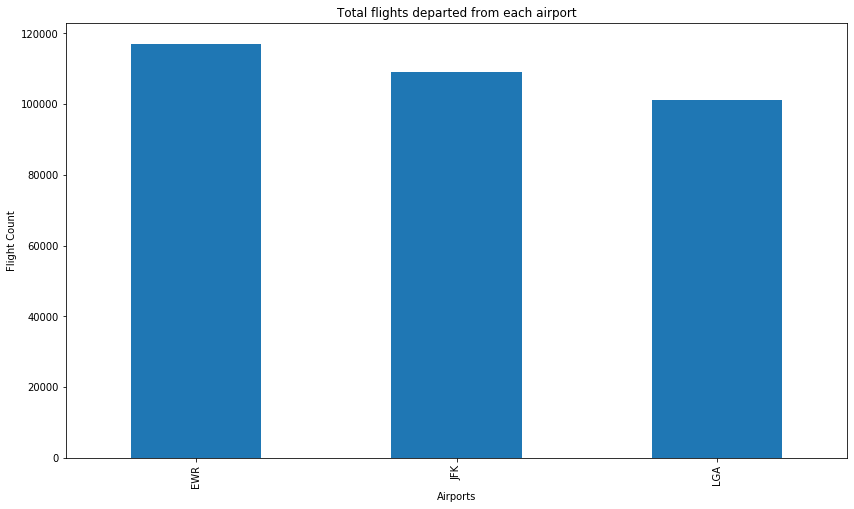

In [3]:
ax = flights_data['origin'].value_counts().plot(kind='bar', 
                                                figsize=(14,8), 
                                                title="Total flights departed from each airport")
ax.set_xlabel("Airports")
ax.set_ylabel("Flight Count")
plt.show()

###### Report 2 - Percentage of flights departed "on-time" & "delayed" in each airport.

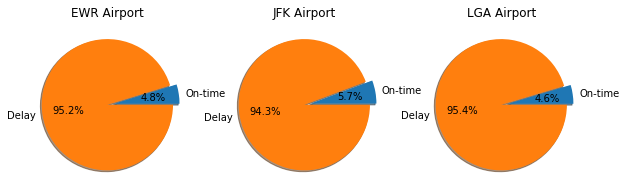

In [4]:
# Calculate ontime and delay flight count at each airport.
ewr_ontime = len(flights_data[(flights_data['dep_delay']==0.0)&(flights_data['origin']=="EWR")])
ewr_delay = len(flights_data[(flights_data['dep_delay']!=0.0)&(flights_data['origin']=="EWR")])

jfk_ontime = len(flights_data[(flights_data['dep_delay']==0.0)&(flights_data['origin']=="JFK")])
jfk_delay = len(flights_data[(flights_data['dep_delay']!=0.0)&(flights_data['origin']=="JFK")])

lga_ontime = len(flights_data[(flights_data['dep_delay']==0.0)&(flights_data['origin']=="LGA")])
lga_delay = len(flights_data[(flights_data['dep_delay']!=0.0)&(flights_data['origin']=="LGA")])


labels = 'On-time', 'Delay'
explode = (0.1, 0)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,10))

# Plot pie charts.
ax1.pie([ewr_ontime, ewr_delay], explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('EWR Airport')

ax2.pie([jfk_ontime, jfk_delay], explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax2.set_title('JFK Airport')

ax3.pie([lga_ontime, lga_delay], explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax3.set_title('LGA Airport')

plt.show()

###### Report 3 - Total departure delay by each carrier.

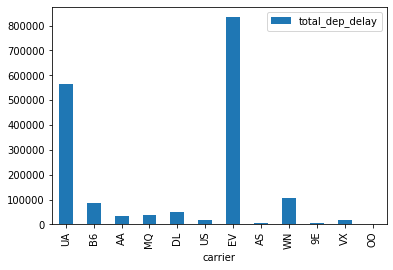

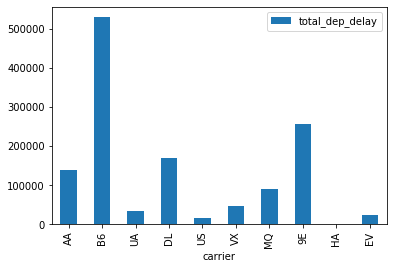

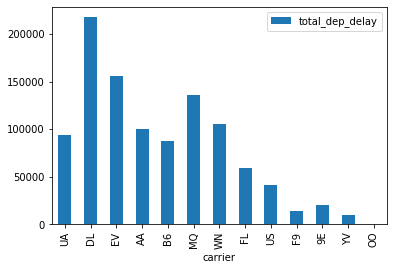

In [5]:
mod_data = flights_data.loc[:, ['origin', 'carrier', 'dep_delay']]

ewr_mod_data = mod_data[mod_data['origin'] == 'EWR'].groupby('carrier', sort=False)["dep_delay"].sum().reset_index(name ='total_dep_delay')
ewr_mod_data[["carrier", "total_dep_delay"]].plot(x="carrier", kind="bar")

jfk_mod_data = mod_data[mod_data['origin'] == 'JFK'].groupby('carrier', sort=False)["dep_delay"].sum().reset_index(name ='total_dep_delay')
jfk_mod_data[["carrier", "total_dep_delay"]].plot(x="carrier", kind="bar")

lga_mod_data = mod_data[mod_data['origin'] == 'LGA'].groupby('carrier', sort=False)["dep_delay"].sum().reset_index(name ='total_dep_delay')
lga_mod_data[["carrier", "total_dep_delay"]].plot(x="carrier", kind="bar")

###### Report 4: Monthwise Total Departure Delay of "DL" and "UA" flights at all airports.

Table showing monthwise Total departure delay of UA Flights from all airports.
    month  total_dep_delay
0    Jan          38180.0
1    Feb          31564.0
2    Mar          56841.0
3    Apr          67710.0
4    May          59154.0
5    Jun          98509.0
6    Jul          98715.0
7    Aug          63044.0
8    Sep          31433.0
9    Oct          33452.0
10   Nov          30750.0
11   Dec          85009.0


Table showing monthwise Total departure delay of UA Flights from all airports.
    month  total_dep_delay
0    Jan          13842.0
1    Feb          18155.0
2    Mar          40860.0
3    Apr          33095.0
4    May          39583.0
5    Jun          76420.0
6    Jul          85417.0
7    Aug          42420.0
8    Sep          21325.0
9    Oct          13983.0
10   Nov          10910.0
11   Dec          43585.0


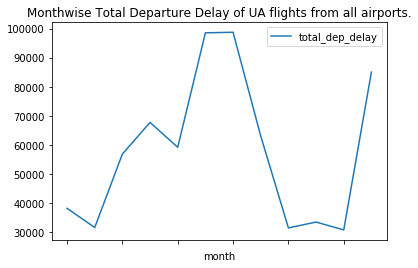

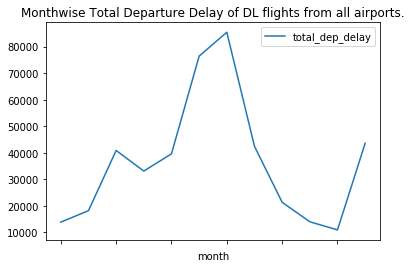

In [6]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

mod_data = flights_data.loc[:, ['carrier', 'dep_delay', 'time_hour']]
ua_data = mod_data[mod_data['carrier'] == 'UA'].drop('carrier', axis=1)
dl_data = mod_data[mod_data['carrier'] == 'DL'].drop('carrier', axis=1)

# Convert timestamp to month.
ua_data['month']=pd.to_datetime(ua_data['time_hour']).dt.strftime('%b')
ua_data.drop('time_hour', axis=1, inplace=True)
dl_data['month']=pd.to_datetime(dl_data['time_hour']).dt.strftime('%b')
dl_data.drop('time_hour', axis=1, inplace=True)

# Calculate monthwise average departure delay.
ua_data = ua_data.groupby('month', sort=True)["dep_delay"].sum().reset_index(name ='total_dep_delay')
dl_data = dl_data.groupby('month', sort=True)["dep_delay"].sum().reset_index(name ='total_dep_delay')

# Sort values based on month.
ua_data['month'] = pd.Categorical(ua_data['month'], categories=months)
ua_data.sort_values(by='month',inplace=True,ignore_index=True)
dl_data['month'] = pd.Categorical(dl_data['month'], categories=months)
dl_data.sort_values(by='month',inplace=True,ignore_index=True)

# Plot
print("Table showing monthwise Total departure delay of UA Flights from all airports.\n", ua_data)
ua_data.plot(x="month", 
             y="total_dep_delay", 
             kind="line",
             title="Monthwise Total Departure Delay of UA flights from all airports.")

print("\n\nTable showing monthwise Total departure delay of UA Flights from all airports.\n", dl_data)
dl_data.plot(x="month", 
             y="total_dep_delay", 
             kind="line", 
             title="Monthwise Total Departure Delay of DL flights from all airports.")

###### Report 5 - Display total delay (dep_delay + arr_delay) for each carrier across all airport in NYC.

Table showing total delay of all carriers across all airports.
    carrier  total_delay
0       UA     899950.0
1       AA     285396.0
2       B6    1212077.0
3       DL     517961.0
4       EV    1821252.0
5       MQ     531288.0
6       US     116493.0
7       WN     328931.0
8       VX      74290.0
9       FL     122942.0
10      AS      -2907.0
11      9E     411930.0
12      F9      28685.0
13      HA       -689.0
14      YV      18744.0
15      OO        711.0


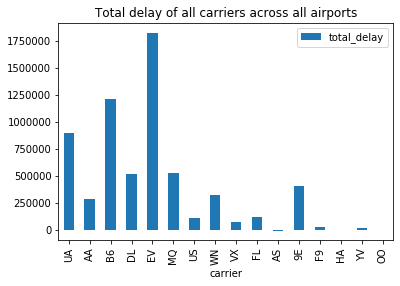

In [7]:
mod_data = flights_data.loc[:, ['carrier', 'dep_delay', 'arr_delay']]

# Combining delays.
mod_data["delay"] = mod_data["dep_delay"] + mod_data["arr_delay"]
mod_data.drop(["dep_delay", "arr_delay"],axis=1, inplace=True)

mod_data = mod_data.groupby('carrier', sort=False)["delay"].sum().reset_index(name ='total_delay')
print("Table showing total delay of all carriers across all airports.\n", mod_data)
mod_data[["carrier", "total_delay"]].plot(x="carrier", kind="bar", title="Total delay of all carriers across all airports")

##### Task 3:
Create a new dataset named (pop_data) with flight data from airlines UA
(United Airlines) and DL (Delta Airlines). The data set must contain only two
columns, company name and delayed arrival flights. The data must be extracted
from dataset flights.csv to build the pop_data dataset. The dataset should be
limited to no more than 20,000 rows per airlines.

In [8]:
# Creating a subset of flights_data with columns "carrier" and "arr_delay".
pop_data = flights_data.loc[:, ['carrier', 'arr_delay']]

# Filter out other carriers data other than "UA (United Airlines)" and DL "(Delta Airlines)".
pop_data = pop_data.loc[pop_data['carrier'].isin(['UA','DL'])]

# Limit data to random 20,000 rows per airlines.
pop_data = pop_data.groupby('carrier', group_keys=False).apply(lambda x: x.sample(20000))
print(pop_data)

       carrier  arr_delay
131190      DL        8.0
110958      DL        0.0
32760       DL        0.0
199998      DL      -21.0
323461      DL      -24.0
...        ...        ...
180712      UA       19.0
183382      UA       -8.0
301552      UA        9.0
259337      UA       37.0
202867      UA      -39.0

[40000 rows x 2 columns]


##### Task 4: 
Create two new datasets (“dl” and “ua”) of 1000 observations each from
the “pop_data” dataset only with data from the DL (Delta Airlines) for “dl” and
only data from UA (United Airlines) for “ua” . Tip: Include a column called
sample_id populated with number 1 for the first sample and 2 for the second
sample

In [9]:
dl = pop_data.loc[(pop_data['carrier'] == "DL")].sample(1000)

# Add sample_id column
dl['sample_id'] = 1

print(dl)

       carrier  arr_delay  sample_id
154280      DL       -1.0          1
18982       DL       31.0          1
307485      DL        5.0          1
101634      DL      -18.0          1
6180        DL      -11.0          1
...        ...        ...        ...
7295        DL       -5.0          1
275617      DL       10.0          1
266238      DL      -12.0          1
14079       DL       13.0          1
236058      DL      -31.0          1

[1000 rows x 3 columns]


In [10]:
ua = pop_data.loc[(pop_data['carrier'] == "UA")].sample(1000)

# Add sample_id column
ua['sample_id'] = 2

print(ua)

       carrier  arr_delay  sample_id
105197      UA      184.0          2
204064      UA      -15.0          2
199943      UA      -19.0          2
310866      UA      -30.0          2
321479      UA      -26.0          2
...        ...        ...        ...
13171       UA       38.0          2
112111      UA      -15.0          2
281096      UA      -21.0          2
169600      UA        5.0          2
130078      UA       -3.0          2

[1000 rows x 3 columns]


##### Task 5:
Create a new dataset (samples) containing the data of the 2 samples
created in the previous item to be used in future analysis.

In [11]:
# Create a dataset names "samples" with previous two samples.
samples = pd.concat([dl, ua], ignore_index=True)

print(samples)

     carrier  arr_delay  sample_id
0         DL       -1.0          1
1         DL       31.0          1
2         DL        5.0          1
3         DL      -18.0          1
4         DL      -11.0          1
...      ...        ...        ...
1995      UA       38.0          2
1996      UA      -15.0          2
1997      UA      -21.0          2
1998      UA        5.0          2
1999      UA       -3.0          2

[2000 rows x 3 columns]


###### Task 6:
For each sample (“dl” and “ua”) calculate the standard error and mean.

In [12]:
# Calculating Standard Error and Mean for DL data.
dl_std_error = np.std(dl["arr_delay"], ddof=1) / np.sqrt(np.size(dl["arr_delay"]))
dl_mean = np.mean(dl["arr_delay"])
print("Standard error for DL: ", dl_std_error)
print("Mean for DL: ", dl_mean)

Standard error for DL:  1.3936410105426247
Mean for DL:  1.687


In [13]:
# Calculating Standard Error and Mean for UA data.
ua_std_error = np.std(ua["arr_delay"], ddof=1) / np.sqrt(np.size(ua["arr_delay"]))
ua_mean = np.mean(ua["arr_delay"])
print("Standard error for UA: ", ua_std_error)
print("Mean for UA: ", ua_mean)

Standard error for UA:  1.2219905633583832
Mean for UA:  1.518


##### Task 7 : 
For each mean define the “confidence intervals”. Calculate lower and upper values.

In [14]:
# Confidence interval for DL.
confidence_level = 0.95
degrees_of_freedom = dl["arr_delay"].size - 1

confidence_interval_dl = stats.t.interval(confidence_level, degrees_of_freedom, dl_mean, dl_std_error)
print("Confidence Interval (DL):", confidence_interval_dl)

lower_value_dl = confidence_interval_dl[0]
upper_value_dl = confidence_interval_dl[1]

print("LowerValue(DL):", lower_value_dl,"- Mean(DL):",dl_mean,"- UpperValue(DL):", upper_value_dl)

Confidence Interval (DL): (-1.04779953692371, 4.42179953692371)
LowerValue(DL): -1.04779953692371 - Mean(DL): 1.687 - UpperValue(DL): 4.42179953692371


In [15]:
# Confidence interval for UA.
confidence_level = 0.95
degrees_of_freedom = ua["arr_delay"].size - 1

confidence_interval_ua = stats.t.interval(confidence_level, degrees_of_freedom, ua_mean, ua_std_error)
print("Confidence Interval (UA):", confidence_interval_ua)

lower_value_ua = confidence_interval_ua[0]
upper_value_ua = confidence_interval_ua[1]

print("LowerValue(UA):", lower_value_ua,"- Mean(UA):",ua_mean,"- UpperValue(UA):", upper_value_ua)

Confidence Interval (UA): (-0.8799627475919756, 3.9159627475919754)
LowerValue(UA): -0.8799627475919756 - Mean(UA): 1.518 - UpperValue(UA): 3.9159627475919754


##### Task 8: 
After these set of previous calculations it was requested
that you take the T-TEST concept and apply it on your 2 groups of
data (“means”) to let your team knows if Delta Airlines (DL) flights
are delayed more than United Airlines (UA) flights ?
Note: Regarding T-TEST you can make a quick research about it on
the web and find ways to use it considering these 2 samples.

Text(0.5, 1.0, 'Distribution and mean of DL.')

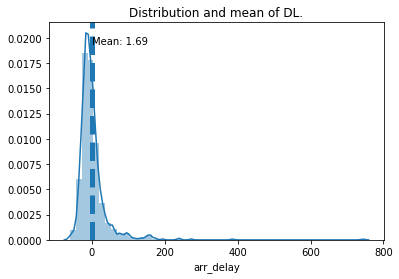

In [16]:
# Plotting distribution and mean of DL.

plt.figure()
ax = sns.distplot(dl["arr_delay"])
plt.axvline(np.mean(dl["arr_delay"]), linestyle="dashed", linewidth=5)
_, max_val = plt.ylim()
plt.text(dl["arr_delay"].mean() + dl["arr_delay"].mean() / 10, max_val - max_val / 10, "Mean: {:.2f}".format(dl["arr_delay"].mean()))
plt.title("Distribution and mean of DL.")

Text(0.5, 1.0, 'Distribution and mean of UA.')

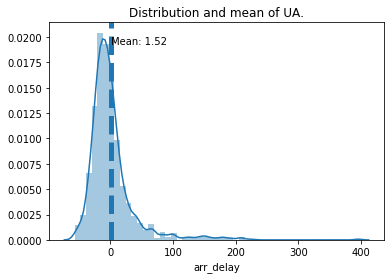

In [17]:
# Plotting distribution and mean of UA.

plt.figure()
ax = sns.distplot(ua["arr_delay"])
plt.axvline(np.mean(ua["arr_delay"]), linestyle="dashed", linewidth=5)
_, max_val = plt.ylim()
plt.text(ua["arr_delay"].mean() + ua["arr_delay"].mean() / 10, max_val - max_val / 10, "Mean: {:.2f}".format(ua["arr_delay"].mean()))
plt.title("Distribution and mean of UA.")

###### Let the Null Hypothesis [H0] be "Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights."

In [18]:
alpha = 0.05

statistic, pvalue = stats.ttest_ind(dl["arr_delay"], ua["arr_delay"])
print('statistics=%.3f, pvalue=%.3f' % (statistic, pvalue))

if pvalue > alpha:
    print("Same distribution [Fail to reject Null Hypothesis].")
else:
    print("Different Distribution [Reject Null Hypothesis].")

statistics=0.091, pvalue=0.927
Same distribution [Fail to reject Null Hypothesis].
